In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 建立 MySQL 連線
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='127.0.0.1',
            database='kol_1017',
            user='root',
            password='123456789',
            port=3306
        )
        if connection.is_connected():
            print("✅ MySQL 連線成功")
            return connection
    except mysql.connector.Error as e:
        print(f"❌ 連線錯誤: {e}")
    return None

# 取得 MySQL 連線
conn = create_connection()





✅ MySQL 連線成功


In [7]:
if conn:
    # **步驟 1**：篩選 ad_label ≠ 0 的貼文
    query = """
        SELECT post_id, likes_count, engagement_rate, author 
        FROM kol_post_detail 
        WHERE ad_label != 0;
    """
    df_posts = pd.read_sql(query, conn)

    # **步驟 2**：計算 likes_count 和 engagement_rate 的敘述統計量
    likes_desc = df_posts['likes_count'].describe()
    engagement_desc = df_posts['engagement_rate'].describe()

    # **步驟 3**：從 accountinfo 取得 followers_num
    query_followers = """
        SELECT account_id, followers_num 
        FROM accountinfo;
    """
    df_accounts = pd.read_sql(query_followers, conn)

    # **匹配 author 和 account_id**
    df_merged = df_posts.merge(df_accounts, left_on="author", right_on="account_id", how="left")

    # **步驟 4**：計算 followers_num 的敘述統計量
    followers_desc = df_merged['followers_num'].describe()

    # **關閉 MySQL 連線**
    conn.close()

    # **提供 post_id 列表**
    post_id_list = df_posts['post_id'].tolist()

    # 顯示敘述統計數據
    print("\n📊 Likes Count 敘述統計量：")
    print(likes_desc)
    print("\n📊 Engagement Rate 敘述統計量：")
    print(engagement_desc)
    print("\n📊 Followers Num 敘述統計量：")
    print(followers_desc)

    # 顯示前 10 個 post_id
    print("\n📌 Post ID 列表（前 10 筆）：")
    print(post_id_list[:10])


📊 Likes Count 敘述統計量：
count      8888.000000
mean      10932.959946
std       21892.234079
min           7.000000
25%        1316.750000
50%        4148.500000
75%       11000.000000
max      373000.000000
Name: likes_count, dtype: float64

📊 Engagement Rate 敘述統計量：
count    8888.000000
mean        0.074164
std         0.786000
min         0.000113
25%         0.011519
50%         0.024053
75%         0.048839
max        40.476200
Name: engagement_rate, dtype: float64

📊 Followers Num 敘述統計量：
count    8.888000e+03
mean     3.933212e+05
std      7.217457e+05
min      9.990000e+02
25%      6.300000e+04
50%      1.700000e+05
75%      4.467500e+05
max      9.898000e+06
Name: followers_num, dtype: float64

📌 Post ID 列表（前 10 筆）：
['sherryluerr_003', 'chloe.shih_062', 'gemma_811_072', 'sherryluerr_022', 'sherryluerr_025', 'gemma_811_073', 'sherryluerr_029', 'gemma_811_074', 'gemma_811_075', 'gemma_811_077']


C:\Users\SHI\AppData\Local\Temp\ipykernel_13088\775324307.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_posts = pd.read_sql(query, conn)
C:\Users\SHI\AppData\Local\Temp\ipykernel_13088\775324307.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_accounts = pd.read_sql(query_followers, conn)


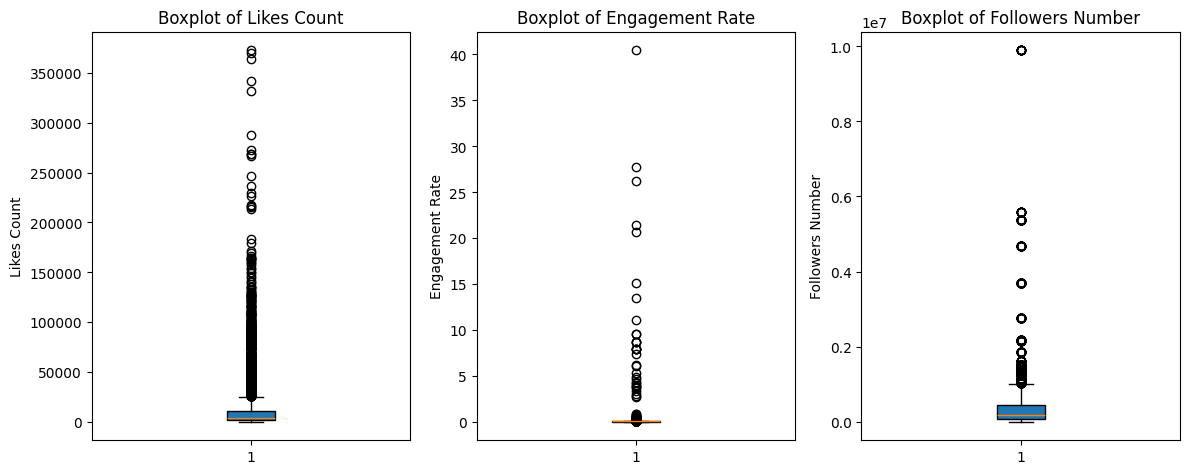

In [8]:
# **使用箱型圖來可視化 likes_count、engagement_rate、followers_num**
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_posts['likes_count'].dropna(), vert=True, patch_artist=True)
plt.ylabel("Likes Count")
plt.title("Boxplot of Likes Count")

plt.subplot(1, 3, 2)
plt.boxplot(df_posts['engagement_rate'].dropna(), vert=True, patch_artist=True)
plt.ylabel("Engagement Rate")
plt.title("Boxplot of Engagement Rate")

plt.subplot(1, 3, 3)
plt.boxplot(df_merged['followers_num'].dropna(), vert=True, patch_artist=True)
plt.ylabel("Followers Number")
plt.title("Boxplot of Followers Number")

plt.tight_layout()
plt.show()

✅ MySQL 連線成功


C:\Users\SHI\AppData\Local\Temp\ipykernel_13088\652303189.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_posts = pd.read_sql(query, conn)
C:\Users\SHI\AppData\Local\Temp\ipykernel_13088\652303189.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_accounts = pd.read_sql(query_followers, conn)


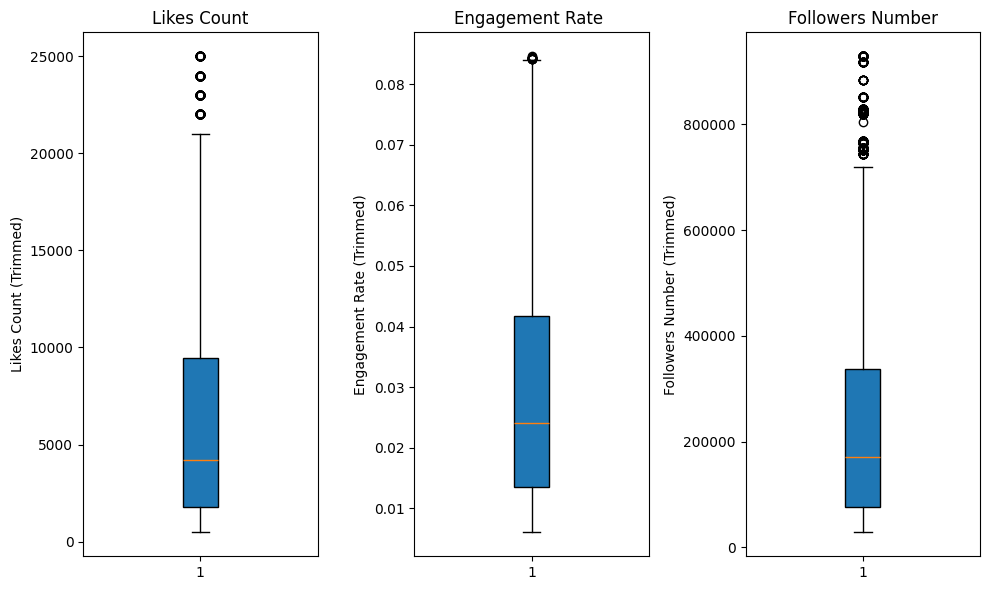


📊 Likes Count 敘述統計量 (Trimmed)：
count     7137.000000
mean      6424.685442
std       6030.808569
min        474.000000
25%       1771.000000
50%       4193.000000
75%       9476.000000
max      25000.000000
Name: likes_count, dtype: float64

📊 Engagement Rate 敘述統計量 (Trimmed)：
count    7110.000000
mean        0.029821
std         0.019913
min         0.006033
25%         0.013587
50%         0.024053
75%         0.041783
max         0.084615
Name: engagement_rate, dtype: float64

📊 Followers Num 敘述統計量 (Trimmed)：
count      7120.000000
mean     250543.679775
std      230230.569741
min       28000.000000
25%       76000.000000
50%      170000.000000
75%      337000.000000
max      929000.000000
Name: followers_num, dtype: float64

📊 Article Length 敘述統計量 (Trimmed)：
count    7404.000000
mean       17.721232
std        11.140857
min         4.000000
25%         9.000000
50%        15.000000
75%        25.000000
max        48.000000
Name: article_length, dtype: float64

📊 Hashtags Count 敘述統計

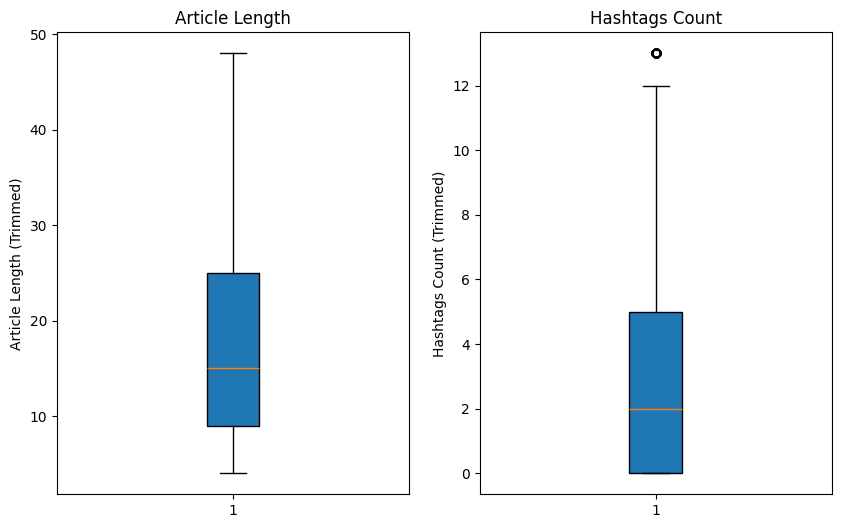

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 建立 MySQL 連線
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='127.0.0.1',
            database='kol_1017',
            user='root',
            password='123456789',
            port=3306
        )
        if connection.is_connected():
            print("✅ MySQL 連線成功")
            return connection
    except mysql.connector.Error as e:
        print(f"❌ 連線錯誤: {e}")
    return None

# 取得 MySQL 連線
conn = create_connection()

if conn:
    # **步驟 1**：篩選 ad_label ≠ 0 的貼文，並取得貼文內容和 hashtags
    query = """
        SELECT post_id, likes_count, engagement_rate, author, article, hashtags
        FROM kol_post_detail 
        WHERE ad_label != 0;
    """
    df_posts = pd.read_sql(query, conn)

    # **步驟 2**：從 `accountinfo` 取得 `followers_num`，基於有業配的 `author`
    author_list = df_posts['author'].unique()
    author_list_sql = ', '.join(f"'{author}'" for author in author_list)  # 加上單引號
    
    query_followers = f"""
        SELECT account_id, followers_num 
        FROM accountinfo
        WHERE account_id IN ({author_list_sql});
    """
    df_accounts = pd.read_sql(query_followers, conn)

    # **匹配 author 和 account_id (KOL 資訊)**
    df_merged = df_posts.merge(df_accounts, left_on="author", right_on="account_id", how="left")

    # **計算初步的敘述統計量**
    likes_desc = df_merged['likes_count'].describe()
    engagement_desc = df_merged['engagement_rate'].describe()
    followers_desc = df_merged['followers_num'].describe()

    # **計算貼文內容的長度 (字數統計)**
    df_merged['article_length'] = df_merged['article'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    article_desc = df_merged['article_length'].describe()

    # **計算 hashtags 的數量**
    df_merged['hashtags_count'] = df_merged['hashtags'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    hashtags_desc = df_merged['hashtags_count'].describe()

    # **關閉 MySQL 連線**
    conn.close()

    # **去除頭尾 10% 數據**
    def trim_outliers(series):
        lower_bound = np.percentile(series.dropna(), 10)
        upper_bound = np.percentile(series.dropna(), 90)
        return series[(series >= lower_bound) & (series <= upper_bound)]

    # 濾除頭尾 10% 的數據
    df_trimmed = df_merged.copy()
    df_trimmed['likes_count'] = trim_outliers(df_merged['likes_count'])
    df_trimmed['engagement_rate'] = trim_outliers(df_merged['engagement_rate'])
    df_trimmed['followers_num'] = trim_outliers(df_merged['followers_num'])
    df_trimmed['article_length'] = trim_outliers(df_merged['article_length'])
    df_trimmed['hashtags_count'] = trim_outliers(df_merged['hashtags_count'])

    # **計算去除頭尾 10% 後的統計量**
    likes_desc_trimmed = df_trimmed['likes_count'].describe()
    engagement_desc_trimmed = df_trimmed['engagement_rate'].describe()
    followers_desc_trimmed = df_trimmed['followers_num'].describe()
    article_desc_trimmed = df_trimmed['article_length'].describe()
    hashtags_desc_trimmed = df_trimmed['hashtags_count'].describe()

    # **可視化去除頭尾 10% 的箱型圖**
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 3, 1)
    plt.boxplot(df_trimmed['likes_count'].dropna(), vert=True, patch_artist=True)
    plt.ylabel("Likes Count (Trimmed)")
    plt.title("Likes Count")

    plt.subplot(1, 3, 2)
    plt.boxplot(df_trimmed['engagement_rate'].dropna(), vert=True, patch_artist=True)
    plt.ylabel("Engagement Rate (Trimmed)")
    plt.title("Engagement Rate ")

    plt.subplot(1, 3, 3)
    plt.boxplot(df_trimmed['followers_num'].dropna(), vert=True, patch_artist=True)
    plt.ylabel("Followers Number (Trimmed)")
    plt.title("Followers Number")

    plt.tight_layout()
    plt.show()

    # **可視化去除頭尾 10% 的箱型圖**
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(df_trimmed['article_length'].dropna(), vert=True, patch_artist=True)
    plt.ylabel("Article Length (Trimmed)")
    plt.title("Article Length")

    plt.subplot(1, 2, 2)
    plt.boxplot(df_trimmed['hashtags_count'].dropna(), vert=True, patch_artist=True)
    plt.ylabel("Hashtags Count (Trimmed)")
    plt.title("Hashtags Count")

    # **顯示去除頭尾 10% 後的敘述統計數據**
    print("\n📊 Likes Count 敘述統計量 (Trimmed)：")
    print(likes_desc_trimmed)
    print("\n📊 Engagement Rate 敘述統計量 (Trimmed)：")
    print(engagement_desc_trimmed)
    print("\n📊 Followers Num 敘述統計量 (Trimmed)：")
    print(followers_desc_trimmed)
   

    # **提供去除頭尾 10% 的 post_id 列表**
    post_id_list_trimmed = df_trimmed['post_id'].dropna().tolist()

    # 顯示前 10 個 post_id
    print("\n📌 Post ID 列表（前 10 筆，去除頭尾 10%）：")
    print(post_id_list_trimmed[:10])


